In [1]:
import tweepy
import json
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import string

In [2]:
%run ~/Documents/UWWork/twitter_credentials.py

In [3]:
auth = tweepy.OAuthHandler(consumer_key=con_key, consumer_secret=con_secret)
auth.set_access_token(acc_token, acc_secret)
api = tweepy.API(auth)

In [4]:
## Democratic Candidates and Twitter names:
candidates = {
'Elizabeth Warren': 'ewarren',
'Bernie Sanders': 'BernieSanders',
'Kamala Harris': 'KamalaHarris',
'Beto O\'Rourke': 'BetoORourke',
'Pete Buttigieg': 'PeteButtigieg',
'Joe Biden': 'JoeBiden',
'Cory Booker': 'CoryBooker',
'Amy Klobuchar': 'amyklobuchar',
'Andrew Yang': 'AndrewYang',
'Julian Castro': 'JulianCastro',
'Kirsten Gillibrand': 'SenGillibrand',
'Jay Inslee': 'JayInslee',
'Tulsi Gabbard': 'TulsiGabbard',
'Stacey Abrams': 'staceyabrams',
'John Hickenlooper': 'Hickenlooper',
'Steve Bullock': 'GovernorBullock',
'John Delaney': 'JohnDelaney',
'Eric Swalwell': 'ericswalwell',
'Tim Ryan': 'RepTimRyan',
'Seth Moulton': 'sethmoulton',
'Michael Bennet': 'SenatorBennet',
'Wayne Messam': 'WayneMessam',
'Terry McAuliffe': 'TerryMcAuliffe',
'Marianne Williamson': 'marwilliamson',
'Bill de Blasio': 'BilldeBlasio'
}

test = {'Elizabeth Warren': 'ewarren', 'Bill de Blasio': 'BilldeBlasio'}


In [5]:
#max allowable with this command is 200 tweets collected for each user, so 200 was used
total_tweets = 200
candidate_tweets = {}
for key, value in candidates.items():
    tweet_list = []
    tweet_status = api.user_timeline(id=value, count = total_tweets)
    for tweet in tweet_status:
        tweet_list.append(tweet.text)
    candidate_tweets[key] = tweet_list

now = datetime.datetime.now()
print(now)



2019-04-28 16:56:07.242114


In [6]:
test_candidate_tweets = {}

for key, value in test.items():
    tweet_list = []
    tweet_status = api.user_timeline(id=value, count = 1000)
    for tweet in tweet_status:
        tweet_list.append(tweet.text)
    test_candidate_tweets[key] = tweet_list

In [7]:
Issue_dict= {
 'Trump': {'Keywords':['trump','mueller','border', 'wall', 'maga', 'tax', '@realdonaldtrump', 'racism', 'hate', 'republicans'],
           'Tweets per User': 0,
           'Marker': False},
 'Healthcare': {'Keywords': ['benefits','insurance','health', 'healthcare', 'universal', 'single-payer','medicaid','medicare','drug'],
           'Tweets per User': 0,
           'Marker': False},                
 'Civilrights' : {'Keywords': ['woman','women','rights','human','lgbtq', 'marriage', 'gender', 'gay', 'lesbian', 'transgender', 'trans','african', 'black', 'asian', 'hispanic', 'diversity', 'women', 'equality', 'abortion', 'muslim', 'race', 'discrimination'],
           'Tweets per User': 0,
           'Marker': False},                   
 'Immigration' : {'Keywords': ['dreamers','refugees','citizenship','amnesty', 'sanctuary','immigration', 'immigrant', 'immigrants', 'visa', 'migrants', 'migrant'],
           'Tweets per User': 0,
           'Marker': False},                  
 'Education': {'Keywords':  ['union','education', 'school', 'schools', 'college', 'colleges', 'teachers','educators','student','students'],
           'Tweets per User': 0,
           'Marker': False},                  
 'Environment' : {'Keywords':  ['lands','climate','clean', 'energy','environment', 'conservation', 'pollution', 'air', 'water'],
           'Tweets per User': 0,
           'Marker': False},                  
 'Jobs' : {'Keywords':  ['pay','jobs','wage','low-income', 'income','working','welfare'],
           'Tweets per User': 0,
           'Marker': False},           
 'Guns' : {'Keywords':  ['nra','guns','gun','violence','shooting','shootings','firearm','firearms', 'gunmakers'],
           'Tweets per User': 0,
           'Marker': False},            
 'Corporation'  : {'Keywords':   ['corporate','corporations','industry','business','profit','profits', 'businesses', 'unions', 'corruption'],
           'Tweets per User': 0,
           'Marker': False}
}

In [8]:
test_dict = {'test': ['trump', 'health', 'african black', 'lgbtq', 'immigration', 'wall marriage']}

In [9]:
issuedict = {}
candidate_tweetcounts = {}

#lists for tweet file dataframe 
username = []
tweettext = []
issue = []


for candidate, tweetlist in candidate_tweets.items():
    for issuekey, issuevalue in Issue_dict.items():
        Issue_dict[issuekey]['Tweets per User'] = 0
    for tweet in tweetlist:
        for issuekey, issuevalue in Issue_dict.items():
            Issue_dict[issuekey]['Marker'] = False
        tweet_lower = tweet.lower()
        tweet_lower_nopunc = tweet_lower.translate(str.maketrans('','', string.punctuation))
        tweetword_list = [tweet for tweet in tweet_lower_nopunc.split()]
        #markers are to only count a category once per tweet and also to skip looking for key words in that tweet if it has already been counted
        username.append(candidates[candidate])
        tweettext.append(tweet)
        issue_pertweet = []
        for word in tweetword_list:
            for issuekey, issuevalue in Issue_dict.items():
                if word in Issue_dict[issuekey]['Keywords'] and not Issue_dict[issuekey]['Marker']: 
                    Issue_dict[issuekey]['Marker'] = True
                    issue_pertweet.append(issuekey)
        for issuekey, issuevalue in Issue_dict.items(): 
            if Issue_dict[issuekey]['Marker']:
                Issue_dict[issuekey]['Tweets per User'] = Issue_dict[issuekey]['Tweets per User'] + 1
        issue.append(issue_pertweet)
    for issuekey, issuevalue in Issue_dict.items():           
        issuedict[issuekey] = Issue_dict[issuekey]['Tweets per User']
    candidate_tweetcounts[candidate] = dict(issuedict)

    
tweet_file_df = pd.DataFrame({'Username':username, 'Tweet Text':tweettext, 'Issue':issue})
tweet_file_df.to_csv('tweet_file.csv')
#print(candidate_tweetcounts)      

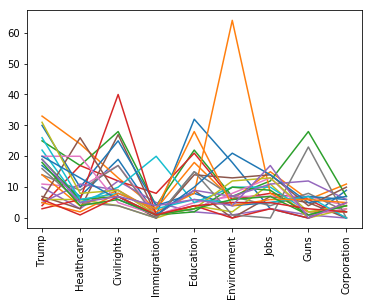

In [10]:
labels = candidate_tweetcounts.keys()
for candidate, issues in candidate_tweetcounts.items():
    plt.plot(issues.keys(), issues.values())
    plt.xticks(rotation = 'vertical')
#    plt.legend(labels, loc=5)
    

In [11]:
candidate_df = pd.DataFrame()
issues_list = []
for key in Issue_dict.keys():
    issues_list.append(key) 
columns = []

for candidate in candidate_tweetcounts.keys():
    issue_df = []
    columns.append(candidate)
    for issue in issues_list:
        issue_df.append(candidate_tweetcounts[candidate][issue])
    df = pd.DataFrame(issue_df)
    candidate_df =pd.concat([candidate_df,df], axis=1)

indexes = {}
for i in range(len(issues_list)):
    indexes[i] = issues_list[i]
candidate_df.columns = columns
candidate_df.rename(index=indexes, inplace=True)
print(candidate_df)

             Elizabeth Warren  Bernie Sanders  Kamala Harris  Beto O'Rourke  \
Trump                      17              33             25              4   
Healthcare                  7              24             17             17   
Civilrights                19              13             28             12   
Immigration                 1               3              4              8   
Education                  32              18             22             21   
Environment                18               6              7              6   
Jobs                        3              15             12              8   
Guns                        0               6             28              6   
Corporation                 9              11              7              0   

             Pete Buttigieg  Joe Biden  Cory Booker  Amy Klobuchar  \
Trump                    10          7           11             14   
Healthcare                3          3           10              9   

In [12]:
candidate_df.to_csv('candidate_tweetcounts.csv', index=True)

In [13]:
tweets_byissue = candidate_df.transpose()
print(tweets_byissue)
tweets_byissue.to_csv('tweets_byissue.csv', index=True)

                     Trump  Healthcare  Civilrights  Immigration  Education  \
Elizabeth Warren        17           7           19            1         32   
Bernie Sanders          33          24           13            3         18   
Kamala Harris           25          17           28            4         22   
Beto O'Rourke            4          17           12            8         21   
Pete Buttigieg          10           3           12            5          2   
Joe Biden                7           3           27            1          9   
Cory Booker             11          10           17            1          5   
Amy Klobuchar           14           9           17            0         15   
Andrew Yang              6           6            4            0          4   
Julian Castro           22           5           10           20          5   
Kirsten Gillibrand      30          10           25            4          8   
Jay Inslee              14           4            9 

In [14]:
cand_col = []
issue_col = []
tweets_col =[]

for row in range(len(tweets_byissue)):
    for column in range(len(tweets_byissue.columns)):
        cand_col.append(tweets_byissue.index[row])
        issue_col.append(tweets_byissue.columns[column])
        tweets_col.append(tweets_byissue.iloc[row,column])
    
longform_candtweets = pd.DataFrame({'Candidate':cand_col, 'Issue': issue_col, 'Tweets':tweets_col})
print(longform_candtweets)

longform_candtweets.to_csv('longform_candtweets.csv')

               Candidate        Issue  Tweets
0       Elizabeth Warren        Trump      17
1       Elizabeth Warren   Healthcare       7
2       Elizabeth Warren  Civilrights      19
3       Elizabeth Warren  Immigration       1
4       Elizabeth Warren    Education      32
5       Elizabeth Warren  Environment      18
6       Elizabeth Warren         Jobs       3
7       Elizabeth Warren         Guns       0
8       Elizabeth Warren  Corporation       9
9         Bernie Sanders        Trump      33
10        Bernie Sanders   Healthcare      24
11        Bernie Sanders  Civilrights      13
12        Bernie Sanders  Immigration       3
13        Bernie Sanders    Education      18
14        Bernie Sanders  Environment       6
15        Bernie Sanders         Jobs      15
16        Bernie Sanders         Guns       6
17        Bernie Sanders  Corporation      11
18         Kamala Harris        Trump      25
19         Kamala Harris   Healthcare      17
20         Kamala Harris  Civilrig

In [15]:
tweet_file_df.head(100).to_csv('tweetfile_top100.csv')